In [35]:
import numpy as np
import pandas as pd
from unc_tools import UncRegression
from IPython.display import display
import matplotlib.pyplot as plt

V = 0.6
V0 = 100
ro = 0.899
M = 12 * 4 + 8 + 16 * 2

a = V * ro / (M * (V+V0))
b = 5e-3
a = 0.061

def func(x):
    return 1 / (b-a) * np.log((b-x)/(a-x))



/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.

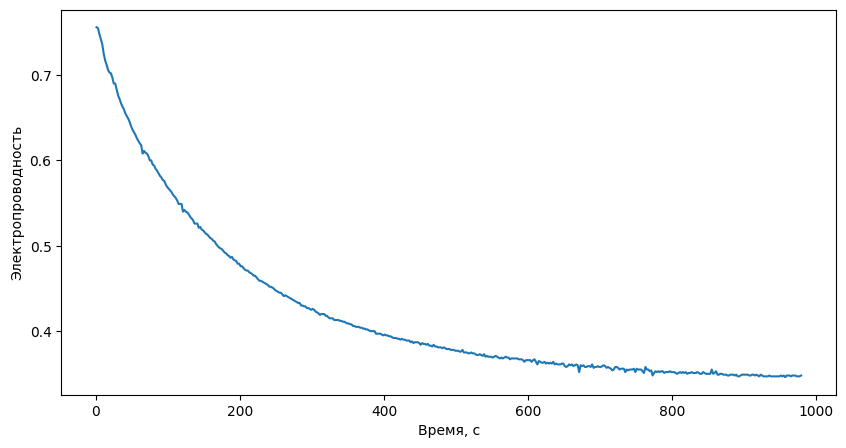

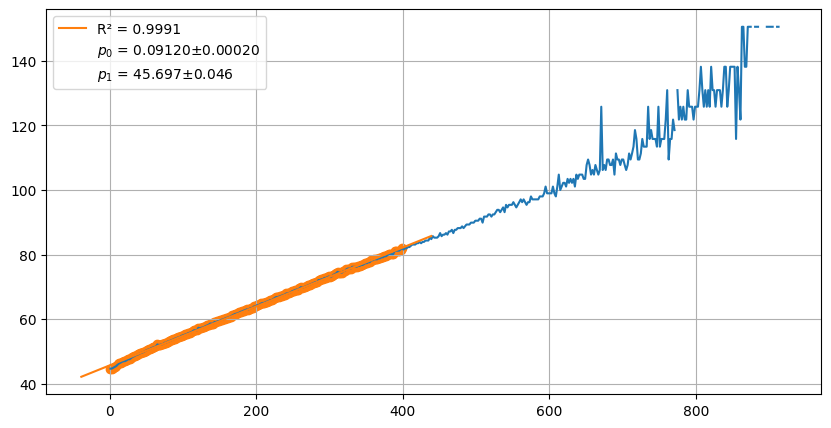

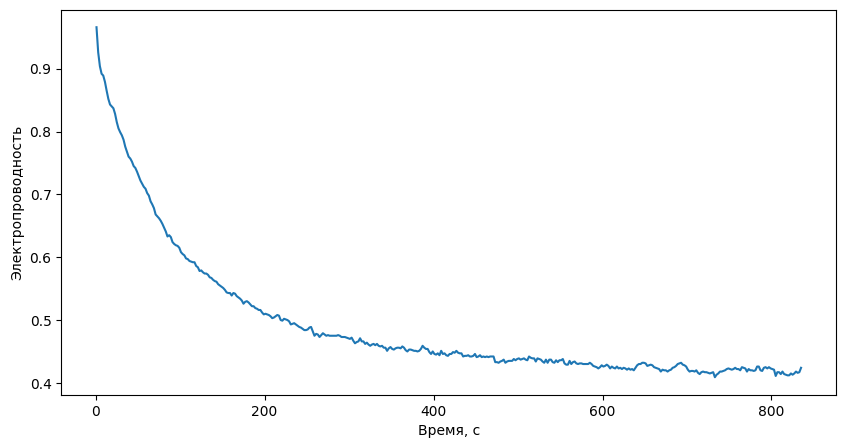

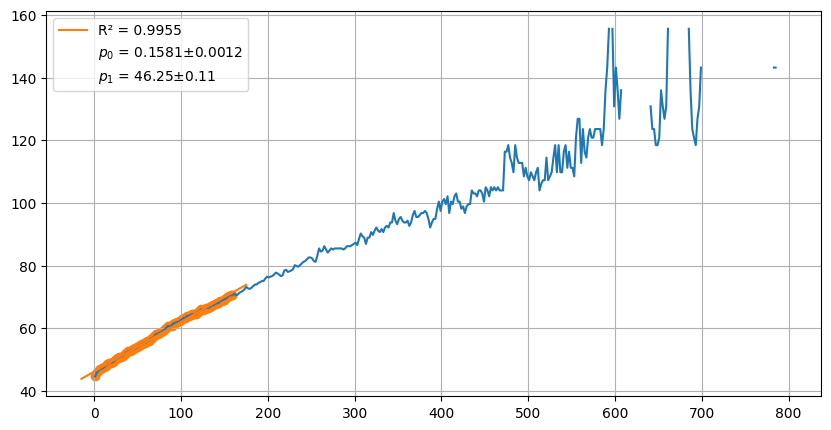

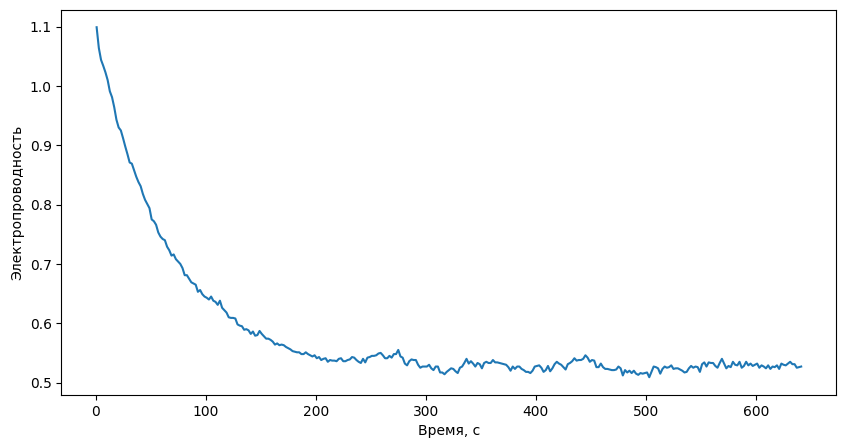

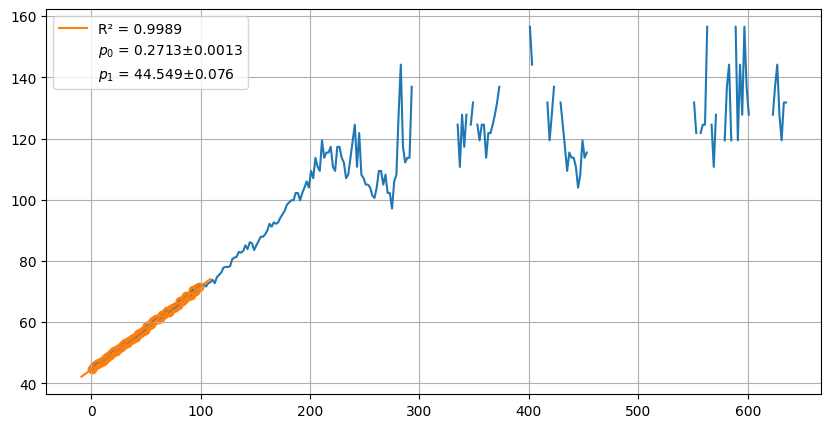

In [38]:
for i in range(1,2):

    with open(f"data/T{i}.txt", "r") as f:

        df_exp = pd.read_csv(f"data/T{j}.txt", 
                             sep="\t", 
                             dtype = np.float32, 
                             decimal = ",", 
                             names = ["time", "temp"])

slices = [slice(0,200), slice(0,80), slice(0,50)]
k = []

for j in range(1,4):
    
    with open(f"data/exp{j}.txt", "r") as f:

        df_exp = pd.read_csv(f"data/exp{j}.txt", sep="\t", dtype = np.float32, decimal = ",", names = ["time", "kappa"])
        df_exp.to_csv(f"export/default_data{j}.csv")
        #display(df_exp)
        
        kappa0 = df_exp.kappa.iloc[0]
        kappainf = df_exp.kappa.iloc[-1]
        df_exp["x"] = b * (df_exp.kappa - kappa0) / (kappainf - kappa0)


        fig, ax = plt.subplots(figsize = (10,5))
        ax.set_xlabel("Время, с")
        ax.set_ylabel("Электропроводность")
        ax.plot(df_exp.time, df_exp.kappa)


        df_exp["y"] = func(df_exp.x)
        df_exp.to_csv(f"export/default_data{j}.csv")
        fig, ax = plt.subplots(figsize = (10,5))
        ax.set_xlabel("Время, с")
        #ax.set_ylabel("")
        ax.plot(df_exp.time, df_exp.y)
        fig.savefig(f"export/time-kappa{j}.png")
        
        sl = slices[j-1]
        df_exp = df_exp.iloc[sl]
        reg = UncRegression(df_exp.time, df_exp.y)
        reg.plot(ax=ax)
        fig.savefig(f"export/fitted{j}.png")
        reg.to_csv(f"export/fitted_data{j}.csv")
        k.append(reg.coefs[0])




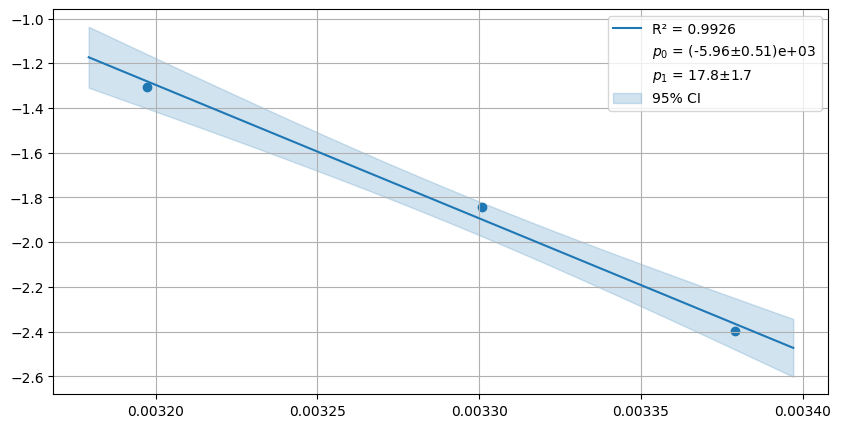

In [29]:
from uncertainties.umath import exp

df = pd.DataFrame({"k": [0.09120, 0.1581, 0.2713], "temp": [295.95, 302.95, 312.75]})

reg = UncRegression(1/df.temp, np.log(df.k))
fig, ax = plt.subplots(figsize=(10,5))

reg.plot(ax = ax, show_band=True)
fig.savefig("export/final.png")

a, b = reg.coefs

reg.to_csv("export/final.csv")

In [4]:
df = pd.read_csv("450a6f3.csv")

df

,Unnamed: 0,x,y,x_std,y_std
0,0,0.003379,-2.394700,0.0,0.0
1,1,0.003301,-1.844528,0.0,0.0
2,2,0.003197,-1.304530,0.0,0.0
